In [6]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from nltk.metrics.confusionmatrix import ConfusionMatrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from google.colab import drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
print(news_dataset.shape)
print(news_dataset)

(20800, 5)
          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                           

In [10]:
import nltk
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

# merging the author name and news title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

# Stemming:Stemming is the process of reducing a word to its Root word example: actor, actress, acting --> act
port_stem = PorterStemmer() 


def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


news_dataset['content'] = news_dataset['content'].apply(stemming)
 
# separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [12]:
# Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Accuracy, Precision, Recall, F1_Score

In [13]:
#function to calculate accuracy
def accuracy(model):
  # accuracy score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
  print('Accuracy score of the training data : ', training_data_accuracy)

  # accuracy score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
  print('Accuracy score of the test data : ', test_data_accuracy)  

#function to calculate precision
def precision(model):
  # precision score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_precision = precision_score(X_train_prediction, Y_train)
  print('\nPrecision of the training data : ', training_data_precision)

  # precision score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_precision = precision_score(X_test_prediction, Y_test)
  print('Precision of the test data : ', test_data_precision)

#function to calculate recall
def recall(model):
  # recall score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_recall = recall_score(X_train_prediction, Y_train)
  print('\nRecall of the training data : ', training_data_recall)

  # recall score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_recall = recall_score(X_test_prediction, Y_test)
  print('Recall of the test data : ', test_data_recall)

#function to calculate f1_score
def f1score(model):
  # f1_score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_f1_score = f1_score(X_train_prediction, Y_train)
  print('\nf1_score of the training data : ', training_data_f1_score)

  # f1_score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_f1_score = f1_score(X_test_prediction, Y_test)
  print('f1_score of the test data : ', test_data_f1_score)   

1. Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, Y_train)

accuracy(mnb)
precision(mnb)
recall(mnb)
f1score(mnb)

Accuracy score of the training data :  0.9782451923076924
Accuracy score of the test data :  0.9550480769230769

Precision of the training data :  0.9585834333733494
Precision of the test data :  0.9164666346615459

Recall of the training data :  0.9978755311172207
Recall of the test data :  0.9932362122788762

f1_score of the training data :  0.9778349253000245
f1_score of the test data :  0.9533083645443196


2. K-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, Y_train)

accuracy(knn)
precision(knn)
recall(knn)
f1score(knn)

Accuracy score of the training data :  0.5360576923076923
Accuracy score of the test data :  0.5233173076923077

Precision of the training data :  0.9998799519807923
Precision of the test data :  1.0

Recall of the training data :  0.5190054835493519
Recall of the test data :  0.5122970978848992

f1_score of the training data :  0.683321027155632
f1_score of the test data :  0.6775085379736543


3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

accuracy(clf)
precision(clf)
recall(clf)
f1score(clf)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9920673076923077

Precision of the training data :  1.0
Precision of the test data :  0.9913586173787806

Recall of the training data :  1.0
Recall of the test data :  0.9927884615384616

f1_score of the training data :  1.0
f1_score of the test data :  0.99207302426135


4.Bagging Decision Tree

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, Y_train)

accuracy(bg)
precision(bg)
recall(bg)
f1score(bg)

Accuracy score of the training data :  0.9965144230769231
Accuracy score of the test data :  0.9899038461538462

Precision of the training data :  0.9966386554621849
Precision of the test data :  0.9894383101296207

Recall of the training data :  0.9963994239078252
Recall of the test data :  0.9903892359442575

f1_score of the training data :  0.9965190253270917
f1_score of the test data :  0.9899135446685878


5.Boosting Decision Tree



In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, Y_train)

accuracy(adb)
precision(adb)
recall(adb)
f1score(adb)

Accuracy score of the training data :  0.9759014423076923
Accuracy score of the test data :  0.9709134615384616

Precision of the training data :  0.9993997599039616
Precision of the test data :  0.9956793086893903

Recall of the training data :  0.9545923632610939
Recall of the test data :  0.9487648673376029

f1_score of the training data :  0.9764823177526244
f1_score of the test data :  0.9716561255563363


6. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, Y_train)

accuracy(rf)
precision(rf)
recall(rf)
f1score(rf)

Accuracy score of the training data :  0.9165264423076923
Accuracy score of the test data :  0.9180288461538462

Precision of the training data :  0.9902761104441776
Precision of the test data :  0.9903984637542007

Recall of the training data :  0.8631369676676781
Recall of the test data :  0.8653523489932886

f1_score of the training data :  0.9223458377592665
f1_score of the test data :  0.9236624132527423


7.Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, Y_train)

accuracy(lr)
precision(lr)
recall(lr)
f1score(lr)

Accuracy score of the training data :  0.9865985576923076
Accuracy score of the test data :  0.9790865384615385

Precision of the training data :  0.9941176470588236
Precision of the test data :  0.9932789246279404

Recall of the training data :  0.9794204612655234
Recall of the test data :  0.9659197012138189

f1_score of the training data :  0.9867143282692882
f1_score of the test data :  0.9794082840236686


8. Support Vector Machine

In [21]:
from sklearn.svm import LinearSVC
svm=LinearSVC()
svm.fit(X_train, Y_train)

accuracy(svm)
precision(svm)
recall(svm)
f1score(svm)

Accuracy score of the training data :  0.9993990384615384
Accuracy score of the test data :  0.9923076923076923

Precision of the training data :  0.9990396158463385
Precision of the test data :  0.9923187710033605

Recall of the training data :  0.9997597308986065
Recall of the test data :  0.9923187710033605

f1_score of the training data :  0.9993995436531764
f1_score of the test data :  0.9923187710033605


9. Voting Classifier (Ensemble Learning)

In [22]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) K-Nearest Neighbours =  knn
# 3) Decision Tree = clf
# 4) Bagging Decision Tree = bg
# 5) Boosting Decision Tree = adb
# 6) Random Forest = rf
# 7) Logistic Regression =lr
# 8) Support Vector Machine = svm
ensemble=VotingClassifier(estimators=[('mnb',mnb),('knn',knn),('clf',clf),('bg',bg),('adb',adb),('rf',rf),('lr',lr),('svm',svm)])
ensemble.fit(X_train, Y_train)

Y_pred = ensemble.predict(X_test)
accuracy(ensemble)
precision(ensemble)
recall(ensemble)
f1score(ensemble)

Accuracy score of the training data :  0.9979567307692307
Accuracy score of the test data :  0.9915865384615384

Precision of the training data :  0.9990396158463385
Precision of the test data :  0.9956793086893903

Recall of the training data :  0.9968854815524677
Recall of the test data :  0.9876190476190476

f1_score of the training data :  0.997961386257345
f1_score of the test data :  0.991632799426249


cross-validation

In [23]:
#50-fold cross-validation 
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
result = model_selection.cross_val_score(ensemble, X_train, Y_train, cv=kfold)
#Printing the accuracies achieved in cross-validation
print('Accuracy achieved in cross-validation = ',result.mean())

Accuracy achieved in cross-validation =  0.9923076923076923


Confusion matrix

[[2051   26]
 [   9 2074]]


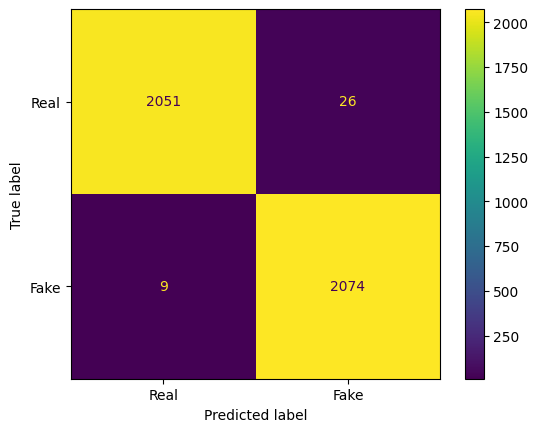

In [24]:
#Confusion matrix
cm_HybridEnsembler = confusion_matrix(Y_test, Y_pred)
print(cm_HybridEnsembler)

#printing confusion matrix using Matplotlib
#data.classes_arry[0,1], 0 = Real 1= Fake

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm_HybridEnsembler,display_labels=['Real','Fake'])
cm_disp.plot()

Plot ROC and compare AUC



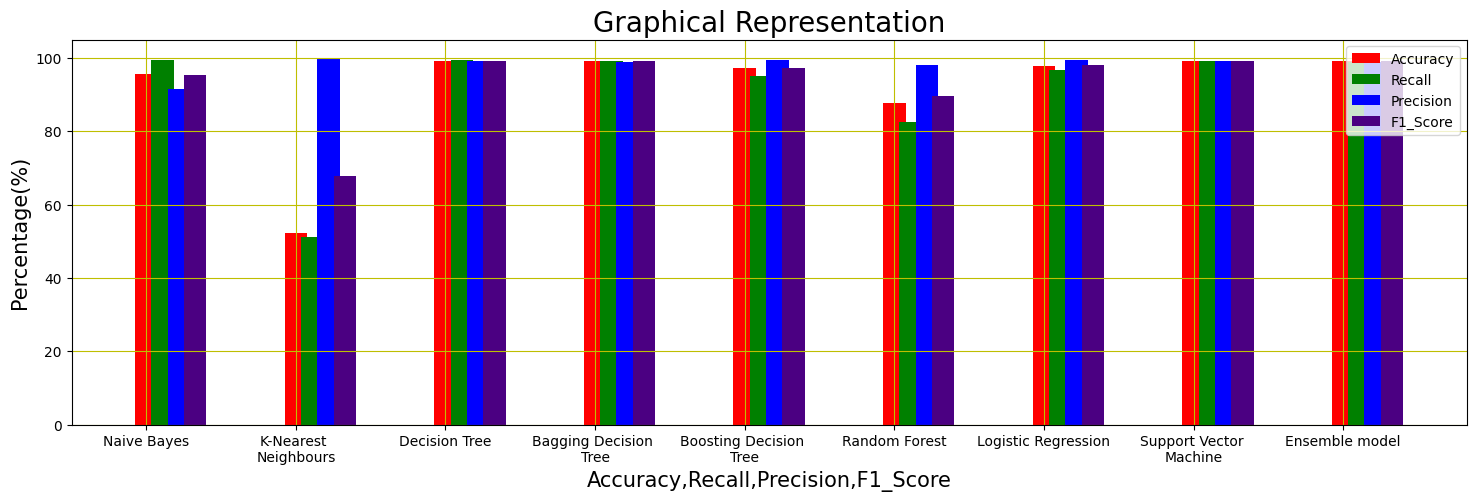

In [25]:
# plot a bar chat to display the Accuracy
plt.figure(figsize=(18,5))

x=['Naive Bayes','K-Nearest \nNeighbours','Decision Tree','Bagging Decision \nTree',
   'Boosting Decision \nTree','Random Forest','Logistic Regression','Support Vector \nMachine','Ensemble model']
ac=[95.50,52.33,99.11,99.06,97.18,87.77,97.90,99.23,99.23]
re=[99.32,51.22,99.32,99.18,94.96,82.52,96.59,99.23,98.94]
pr=[91.64,100,99.18,98.84,99.51,98.17,99.32,99.23,98.94]
f1=[95.33,67.75,99.25,99.01,97.18,89.67,97.94,99.23,99.23]
x_index=np.arange(len(x))
width=0.109
plt.bar(x,ac,color="red",width=0.15,label="Accuracy")
plt.bar(x_index+width,re,color="green",width=0.15,label="Recall")
plt.bar(x_index+width+width,pr,color="blue",width=0.15,label="Precision")
plt.bar(x_index+width+width+width,f1,color="indigo",width=0.15,label="F1_Score")

plt.legend()
plt.xlabel("Accuracy,Recall,Precision,F1_Score",fontsize=15)
plt.ylabel("Percentage(%)",fontsize=15)
plt.title("Graphical Representation",fontsize=20)
plt.grid(color="y")

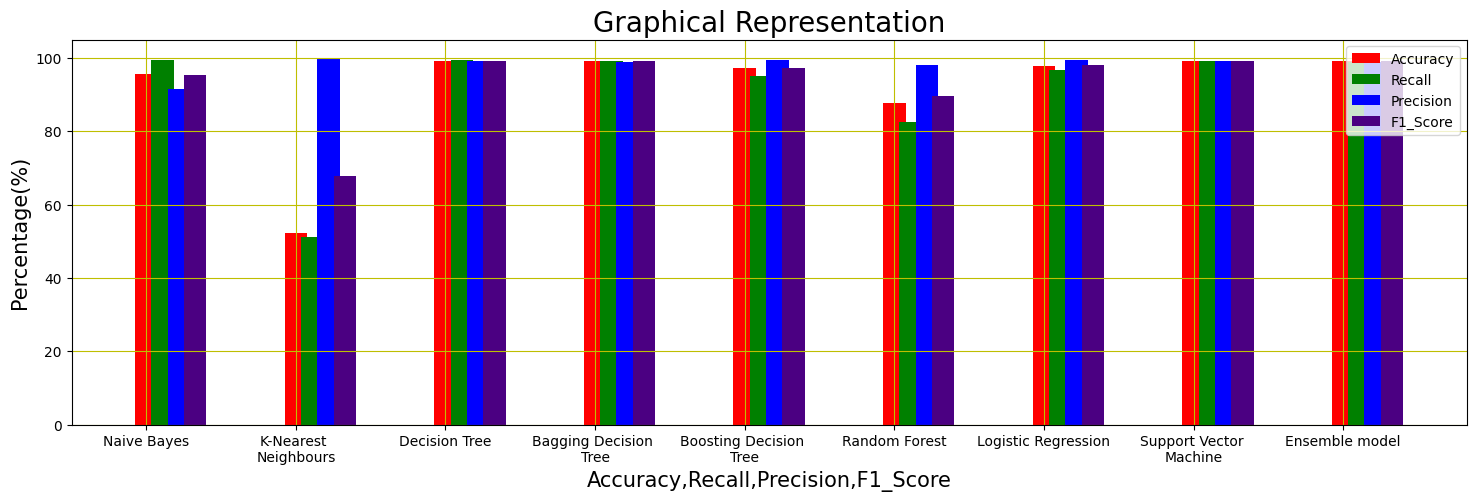

In [26]:
# plot a bar chat to display the Accuracy
plt.figure(figsize=(18,5))

x=['Naive Bayes','K-Nearest \nNeighbours','Decision Tree','Bagging Decision \nTree',
   'Boosting Decision \nTree','Random Forest','Logistic Regression','Support Vector \nMachine','Ensemble model']
ac=[95.50,52.33,99.11,99.06,97.18,87.77,97.90,99.23,99.23]
re=[99.32,51.22,99.32,99.18,94.96,82.52,96.59,99.23,98.94]
pr=[91.64,100,99.18,98.84,99.51,98.17,99.32,99.23,98.94]
f1=[95.33,67.75,99.25,99.01,97.18,89.67,97.94,99.23,99.23]
x_index=np.arange(len(x))
width=0.109
plt.bar(x,ac,color="red",width=0.15,label="Accuracy")
plt.bar(x_index+width,re,color="green",width=0.15,label="Recall")
plt.bar(x_index+width+width,pr,color="blue",width=0.15,label="Precision")
plt.bar(x_index+width+width+width,f1,color="indigo",width=0.15,label="F1_Score")

plt.legend()
plt.xlabel("Accuracy,Recall,Precision,F1_Score",fontsize=15)
plt.ylabel("Percentage(%)",fontsize=15)
plt.title("Graphical Representation",fontsize=20)
plt.grid(color="y")

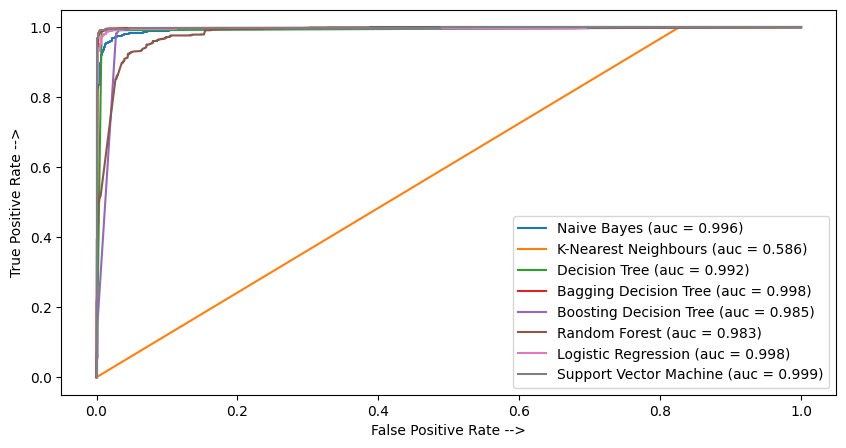

In [27]:
from sklearn.metrics import roc_curve, auc

Y_pred_mnb = mnb.predict_proba(X_test) [:,1]
Y_pred_knn = knn.predict_proba(X_test) [:,1]
Y_pred_clf = clf.predict_proba(X_test) [:,1]
Y_pred_bg = bg.predict_proba(X_test) [:,1]
Y_pred_rf = rf.predict_proba(X_test) [:,1]
Y_pred_lr = lr.decision_function(X_test)
Y_pred_svm = svm.decision_function(X_test)
Y_pred_adb = adb.decision_function(X_test)
Y_pred_ensemble = ensemble.predict(X_test)

mnb_fpr, mnb_tpr, threshold = roc_curve(Y_test, Y_pred_mnb)
knn_fpr, knn_tpr, threshold = roc_curve(Y_test, Y_pred_knn)
clf_fpr, clf_tpr, threshold = roc_curve(Y_test, Y_pred_clf)
bg_fpr, bg_tpr, threshold = roc_curve(Y_test, Y_pred_bg)
adb_fpr, adb_tpr, threshold = roc_curve(Y_test, Y_pred_adb)
rf_fpr, rf_tpr, threshold = roc_curve(Y_test, Y_pred_rf)
lr_fpr, lr_tpr, threshold = roc_curve(Y_test, Y_pred_lr)
svm_fpr, svm_tpr, threshold = roc_curve(Y_test, Y_pred_svm)
ensemble_fpr, ensemble_tpr, threshold = roc_curve(Y_test, Y_pred_ensemble)

auc_mnb = auc(mnb_fpr, mnb_tpr)
auc_knn = auc(knn_fpr, knn_tpr)
auc_clf = auc(clf_fpr, clf_tpr)
auc_bg = auc(bg_fpr, bg_tpr)
auc_adb = auc(adb_fpr, adb_tpr)
auc_rf = auc(rf_fpr, rf_tpr)
auc_lr = auc(lr_fpr, lr_tpr)
auc_svm = auc(svm_fpr, svm_tpr)
auc_ensemble = auc(ensemble_fpr, ensemble_tpr)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(mnb_fpr, mnb_tpr, linestyle='-', label='Naive Bayes (auc = %0.3f)' % auc_mnb)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='K-Nearest Neighbours (auc = %0.3f)' % auc_knn)
plt.plot(clf_fpr, clf_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_clf)
plt.plot(bg_fpr, bg_tpr, linestyle='-', label='Bagging Decision Tree (auc = %0.3f)' % auc_bg)
plt.plot(adb_fpr, adb_tpr, linestyle='-', label='Boosting Decision Tree (auc = %0.3f)' % auc_adb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='Support Vector Machine (auc = %0.3f)' % auc_svm)
#plt.plot(ensemble_fpr, ensemble_tpr, linestyle='-', label='Ensemble model (auc = %0.3f)' % auc_ensemble)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

Predictive System

In [28]:
# Making a Predictive System
X_new = X_test[2]

prediction = ensemble.predict(X_new)
print(prediction)

if prediction == 0:
    print('The news is Real')
else:
    print('The news is Fake')

#verification
print("Verification:",Y_test[2])

[1]
The news is Fake
Verification: 1
